In [77]:
import numpy as np

import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm

import warnings
warnings.filterwarnings("ignore")

import zipfile
import os

In [78]:
ca_data = pd.read_csv("15minute_data_california.csv")

In [79]:
ca_data[["grid"]]

,grid
0,1.717
1,1.905
2,1.923
3,1.535
4,1.010
...,...
805519,0.362
805520,0.323
805521,0.303
805522,0.357


In [66]:
len(np.unique(ca_data["dataid"]))

23

In [67]:
ca_data.columns

Index(['dataid', 'local_15min', 'air1', 'air2', 'air3', 'airwindowunit1',
       'aquarium1', 'bathroom1', 'bathroom2', 'bedroom1', 'bedroom2',
       'bedroom3', 'bedroom4', 'bedroom5', 'battery1', 'car1', 'car2',
       'circpump1', 'clotheswasher1', 'clotheswasher_dryg1', 'diningroom1',
       'diningroom2', 'dishwasher1', 'disposal1', 'drye1', 'dryg1', 'freezer1',
       'furnace1', 'furnace2', 'garage1', 'garage2', 'grid', 'heater1',
       'heater2', 'heater3', 'housefan1', 'icemaker1', 'jacuzzi1', 'kitchen1',
       'kitchen2', 'kitchenapp1', 'kitchenapp2', 'lights_plugs1',
       'lights_plugs2', 'lights_plugs3', 'lights_plugs4', 'lights_plugs5',
       'lights_plugs6', 'livingroom1', 'livingroom2', 'microwave1', 'office1',
       'outsidelights_plugs1', 'outsidelights_plugs2', 'oven1', 'oven2',
       'pool1', 'pool2', 'poollight1', 'poolpump1', 'pump1', 'range1',
       'refrigerator1', 'refrigerator2', 'security1', 'sewerpump1', 'shed1',
       'solar', 'solar2', 'sprinkler1

In [ ]:
ca_data

In [68]:
ca_data = ca_data[["dataid", "local_15min", "leg1v", "leg2v"]]
ca_data["date"] = pd.to_datetime(ca_data["local_15min"].str[:-3], format='%Y-%m-%d %H:%M:%S')
ca_data["day of week"] = [d.weekday() for d in ca_data["date"]]
ca_data["hour"] = [d.hour for d in ca_data["date"]]
ca_data

,dataid,local_15min,leg1v,leg2v,date,day of week,hour
0,3687,2014-01-01 00:00:00-06,120.239,119.769,2014-01-01 00:00:00,2,0
1,3687,2014-01-01 00:15:00-06,120.256,119.628,2014-01-01 00:15:00,2,0
2,3687,2014-01-01 00:30:00-06,120.358,119.859,2014-01-01 00:30:00,2,0
3,3687,2014-01-01 00:45:00-06,120.766,119.985,2014-01-01 00:45:00,2,0
4,3687,2014-01-01 01:00:00-06,120.844,120.368,2014-01-01 01:00:00,2,1
...,...,...,...,...,...,...,...
805519,6547,2015-09-30 22:45:00-05,121.619,120.179,2015-09-30 22:45:00,2,22
805520,6547,2015-09-30 23:00:00-05,121.167,119.729,2015-09-30 23:00:00,2,23
805521,6547,2015-09-30 23:15:00-05,121.198,120.253,2015-09-30 23:15:00,2,23
805522,6547,2015-09-30 23:30:00-05,120.710,119.750,2015-09-30 23:30:00,2,23


In [69]:
max(ca_data["local_15min"])

'2018-12-31 23:45:00-06'

In [70]:
min(ca_data["local_15min"])

'2014-01-01 00:00:00-06'

In [71]:
ca_data["leg1v"].describe()

count    805524.000000
mean        120.387734
std           1.448472
min           0.000000
25%         119.930000
50%         120.392000
75%         120.867000
max         169.449000
Name: leg1v, dtype: float64

In [72]:
ca_data["leg2v"].describe()

count    805524.000000
mean        120.611872
std           1.411108
min           0.000000
25%         120.180000
50%         120.623000
75%         121.073000
max         169.745000
Name: leg2v, dtype: float64

<AxesSubplot:ylabel='leg1v'>

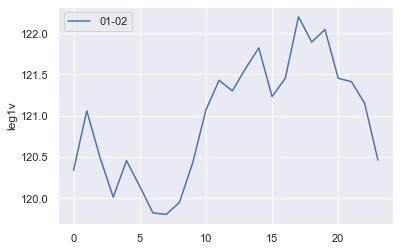

In [73]:
ca_data_3687_hourly = ca_data[ca_data["dataid"] == 3687].iloc[::4, :]
ca_data_3687_hourly["day"] = ca_data_3687_hourly["local_15min"].str[5:10]
ca_data_3687_hourly = ca_data_3687_hourly[["day", "leg1v"]]
sns.lineplot(data = ca_data_3687_hourly[ca_data_3687_hourly["day"] == "01-02"], x=range(0, 24), y="leg1v", label="01-02")

In [74]:
by_hour_of_week = ca_data.groupby(["day of week", "hour"])[["leg1v"]].mean()

In [75]:
by_hour_of_week.sort_values("leg1v", ascending=True).head(20)

,,leg1v
day of week,hour,
4,6,119.732489
1,6,119.743761
2,6,119.753541
0,6,119.762118
3,6,119.769273
5,6,119.900324
3,2,119.902205
6,6,119.904922
1,5,119.920233


In [76]:
by_hour_of_week.sort_values("leg1v", ascending=False).head(20)

leg1v
day of week hour            
1           16    121.005747
            17    120.995070
            18    120.970047
3           17    120.965635
0           15    120.952263
1           15    120.948488
0           17    120.943708
4           17    120.942781
            16    120.941525
0           16    120.939998
1           14    120.937845
2           14    120.936361
3           16    120.935216
            18    120.929531
1           19    120.928282
3           19    120.916551
0           14    120.896325
4           18    120.889830
0           18    120.889468
2           13    120.889411